In [297]:
# Plot the Comparison results of DF with SOTA molecular property prediction methods

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import scipy
from scipy.interpolate import interp1d
import seaborn as sns

In [298]:
all_methods = os.listdir('./result_compare_SOTA//')  
all_datasets = os.listdir('./result_compare_SOTA/DF/')
all_metrics = ['AUROC','AUPRC','accuracy']

In [299]:
pal = sns.color_palette(palette='Set2')
pal = ['#4DBBD5B2', '#00A087B2', '#3C5488B2', '#91D1C2B2', '#B09C85B2', '#8491B4B2', '#F39B7FB2', '#E64B35B2']

In [300]:
all_methods = ['KPGT', 'UniMol','PharmHGT', 'MolCLR', 'BAN', 'KANO', 'ExtraTree', 'DF']

In [301]:
metric = all_metrics[0] # select one metric

# [num_datasets,num_methods],record the 5-CV avg. performance
performance_mat = np.zeros((len(all_datasets),len(all_methods))) 

 # [num_datasets,num_methods],record the ranking
rank_mat = np.zeros((len(all_datasets), len(all_methods)),dtype=int) 

for j, method in enumerate(all_methods):
    for i, dataset in enumerate(all_datasets):
        df = pd.read_csv('./result_compare_SOTA/{}/{}'.format(method,dataset))
        performance_mat[i,j] = float(df[metric].mean())
        
        
# for col in range(len(all_datasets)): # each column
#     sort_index = performance_mat[:,col].argsort()[::-1]    
#     for rank, index in enumerate(sort_index):
#         rank_mat[:,col][index] = rank+1 

In [302]:
# save the performance into .csv
with open('./table_results/performace_vs_SOTA_{}.csv'.format(metric), 'w', newline='') as file:
    writer = csv.writer(file)
    header = ['method']+all_methods
    writer.writerow(header)
    for i,row in enumerate(performance_mat):
        writer.writerow([all_datasets[i]]+list(row))
        
# # save the rank result into .csv
# with open('./table_results/rank_with_different_methods_{}.csv'.format(metric), 'w', newline='') as file:
#     writer = csv.writer(file)
#     header = ['method']+all_datasets
#     writer.writerow(header)
#     for i,row in enumerate(rank_mat):
#         writer.writerow([all_methods[i]]+list(row))

/var/folders/fc/31nlp6zj68d9fkxg15b3wblh0000gn/T/ipykernel_3792/1734589604.py:9: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(data=df[all_methods], palette=['w'],  alpha=0.5)
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


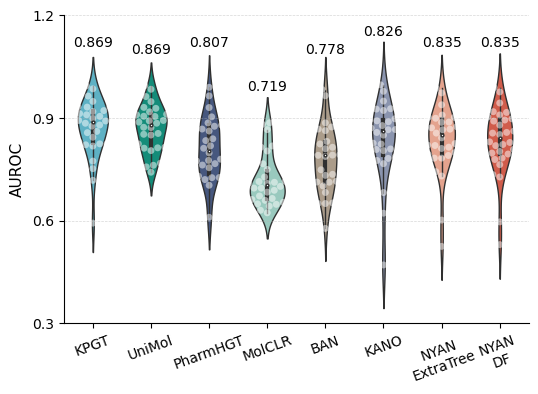

In [303]:
# AUROC
metric='AUROC'
df = pd.read_csv('./table_results/performace_vs_SOTA_{}.csv'.format(metric))
figure, ax = plt.subplots(figsize=(6, 4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


sns.swarmplot(data=df[all_methods], palette=['w'],  alpha=0.5)
sns.violinplot(data=df[all_methods], palette=pal, linewidth=1, width=0.6, alpha=0.7)

# # -------- pvalue mark ------------
# _, pvalue = scipy.stats.wilcoxon(df[all_methods[-2]], df[all_methods[0]])
# p_value_cov = convert_pvalue_to_asterisks(pvalue)
# x1, x2 = 4, 0
# y, h = 1.4, 0.01
# ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c= 'k')
# ax.text((x1+x2)/2, y, p_value_cov, ha='center', va='bottom', color='k')

# _, pvalue = scipy.stats.wilcoxon(df[all_methods[-2]], df[all_methods[1]])
# p_value_cov = convert_pvalue_to_asterisks(pvalue)
# x1, x2 = 4, 1
# y, h = 1.3, 0.01
# ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c= 'k')
# ax.text((x1+x2)/2, y, p_value_cov, ha='center', va='bottom', color='k')

# _, pvalue = scipy.stats.wilcoxon(df[all_methods[-2]], df[all_methods[2]])
# p_value_cov = convert_pvalue_to_asterisks(pvalue)
# x1, x2 = 4, 2
# y, h = 1.2, 0.01
# ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c= 'k')
# ax.text((x1+x2)/2, y, p_value_cov, ha='center', va='bottom', color='k')

# _, pvalue = scipy.stats.wilcoxon(df[all_methods[-2]], df[all_methods[3]])
# p_value_cov = convert_pvalue_to_asterisks(pvalue)
# x1, x2 = 4, 3
# y, h = 1.12, 0.01
# ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c= 'k')
# ax.text((x1+x2)/2, y+0.01, p_value_cov, ha='center', va='bottom', color='k')

# _, pvalue = scipy.stats.wilcoxon(df[all_methods[-1]], df[all_methods[-2]])
# p_value_cov = convert_pvalue_to_asterisks(pvalue)
# x1, x2 = 5, 4
# y, h = 0.57, -0.01
# ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c= 'k')
# ax.text((x1+x2)/2, y+6*h, p_value_cov, ha='center', va='bottom', color='k')

# _, pvalue = scipy.stats.wilcoxon(df[all_methods[-1]], df[all_methods[-3]])
# p_value_cov = convert_pvalue_to_asterisks(pvalue)
# x1, x2 = 5, 3
# y, h = 0.45, -0.01
# ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c= 'k')
# ax.text((x1+x2)/2, y+6*h, p_value_cov, ha='center', va='bottom', color='k')

# _, pvalue = scipy.stats.wilcoxon(df[all_methods[-1]], df[all_methods[-4]])
# p_value_cov = convert_pvalue_to_asterisks(pvalue)
# x1, x2 = 5, 2
# y, h = 0.45, -0.01
# ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c= 'k')
# ax.text((x1+x2)/2, y+6*h, p_value_cov, ha='center', va='bottom', color='k')

ax.text(0, 1.1, 0.869, ha='center', va='bottom', color='k')
ax.text(1, 1.08, 0.869, ha='center', va='bottom', color='k')
ax.text(2, 1.1, 0.807, ha='center', va='bottom', color='k')
ax.text(3, 0.97, 0.719, ha='center', va='bottom', color='k')
ax.text(4, 1.08, 0.778, ha='center', va='bottom', color='k')
ax.text(5, 1.13, 0.826, ha='center', va='bottom', color='k')
ax.text(6, 1.1, 0.835, ha='center', va='bottom', color='k')
ax.text(7, 1.1, 0.835, ha='center', va='bottom', color='k')




ax.set_ylim(0.3,1.2)
ax.set_yticks([0.3,0.6,0.9,1.2])
ax.set_xticklabels(all_methods[0:-2]+['NYAN\nExtraTree','NYAN\nDF'],va='top',rotation=20, fontsize=10)
ax.set_ylabel('{}'.format(metric),fontsize=11, labelpad=5)




plt.grid(axis='y', linestyle='--',linewidth=0.5, alpha=0.5)
figure.savefig('figures/violin_{}.pdf'.format(metric), bbox_inches='tight', pad_inches=0.1)
plt.show()

In [255]:
df[all_methods].mean(0)

KPGT         0.869904
UniMol       0.869210
PharmHGT     0.806851
MolCLR       0.718577
BAN          0.777904
KANO         0.825921
ExtraTree    0.833852
DF           0.832059
dtype: float64

/var/folders/fc/31nlp6zj68d9fkxg15b3wblh0000gn/T/ipykernel_3792/3883119905.py:9: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(data=df[all_methods], palette=['w'],  alpha=0.5)
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of th

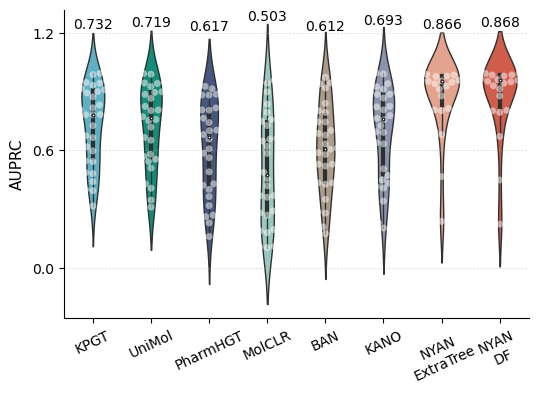

In [296]:
# AUPRC
metric='AUPRC'
df = pd.read_csv('./table_results/performace_vs_SOTA_{}.csv'.format(metric))
figure, ax = plt.subplots(figsize=(6, 4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


sns.swarmplot(data=df[all_methods], palette=['w'],  alpha=0.5)
sns.violinplot(data=df[all_methods], palette=pal, linewidth=1, width=0.6, alpha=0.7)


ax.text(0, 1.21, 0.732, ha='center', va='bottom', color='k')
ax.text(1, 1.22, 0.719, ha='center', va='bottom', color='k')
ax.text(2, 1.20, 0.617, ha='center', va='bottom', color='k')
ax.text(3, 1.25, 0.503, ha='center', va='bottom', color='k')
ax.text(4, 1.20, 0.612, ha='center', va='bottom', color='k')
ax.text(5, 1.23, 0.693, ha='center', va='bottom', color='k')
ax.text(6, 1.21, 0.866, ha='center', va='bottom', color='k')
ax.text(7, 1.22, 0.868, ha='center', va='bottom', color='k')




# ax.set_ylim(0.3,1.2)
ax.set_yticks([0.0, 0.6,1.2])
ax.set_xticklabels(all_methods[0:-2]+['NYAN\nExtraTree','NYAN\nDF'],rotation=25, fontsize=10)
ax.set_ylabel('{}'.format(metric),fontsize=11, labelpad=5)




plt.grid(axis='y', linestyle='--',linewidth=0.5, alpha=0.5)
figure.savefig('figures/violin_{}.pdf'.format(metric), bbox_inches='tight', pad_inches=0.1)
plt.show()

In [265]:
df[all_methods].mean(0)

KPGT         0.731861
UniMol       0.718667
PharmHGT     0.617233
MolCLR       0.502548
BAN          0.611752
KANO         0.693046
ExtraTree    0.866453
DF           0.864145
dtype: float64

/var/folders/fc/31nlp6zj68d9fkxg15b3wblh0000gn/T/ipykernel_3792/483651909.py:9: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(data=df[all_methods], palette=['w'],  alpha=0.5)
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


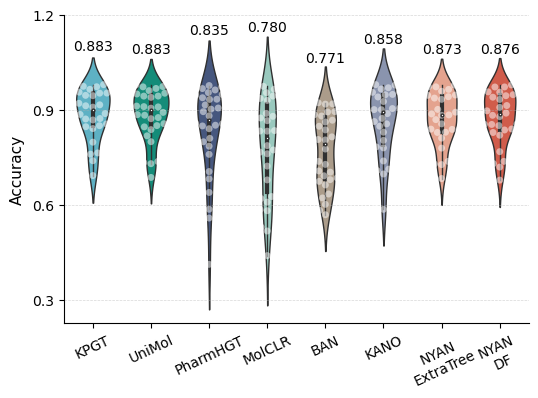

In [304]:
# accuracy
metric='accuracy'
df = pd.read_csv('./table_results/performace_vs_SOTA_{}.csv'.format(metric))
figure, ax = plt.subplots(figsize=(6, 4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


sns.swarmplot(data=df[all_methods], palette=['w'],  alpha=0.5)
sns.violinplot(data=df[all_methods], palette=pal, linewidth=1, width=0.6, alpha=0.7)


ax.text(0, 1.08, 0.883, ha='center', va='bottom', color='k')
ax.text(1, 1.07, 0.883, ha='center', va='bottom', color='k')
ax.text(2, 1.13, 0.835, ha='center', va='bottom', color='k')
ax.text(3, 1.14, '0.780', ha='center', va='bottom', color='k')
ax.text(4, 1.04, 0.771, ha='center', va='bottom', color='k')
ax.text(5, 1.10, 0.858, ha='center', va='bottom', color='k')
ax.text(6, 1.07, 0.873, ha='center', va='bottom', color='k')
ax.text(7, 1.07, 0.876, ha='center', va='bottom', color='k')

# ax.set_ylim(0.3,1.2)
ax.set_yticks([0.3,0.6,0.9,1.2])
ax.set_xticklabels(all_methods[0:-2]+['NYAN\nExtraTree','NYAN\nDF'],rotation=25, fontsize=10)
ax.set_ylabel('{}'.format('Accuracy'),fontsize=11, labelpad=5)


plt.grid(axis='y', linestyle='--',linewidth=0.5, alpha=0.5)
figure.savefig('figures/violin_{}.pdf'.format(metric), bbox_inches='tight', pad_inches=0.1)
plt.show()

In [271]:
df[all_methods].mean(0)

KPGT         0.882631
UniMol       0.883388
PharmHGT     0.834837
MolCLR       0.780158
BAN          0.770868
KANO         0.857668
ExtraTree    0.872802
DF           0.876275
dtype: float64